In [44]:
from helper.data_handling import data_from_file
import numpy as np

def get_columns():
    col = "gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke"
    return col.split(",")

def get_raw_data():
    return data_from_file("../data/stroke_raw.csv")


In [2]:
get_raw_data()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Some pie charts

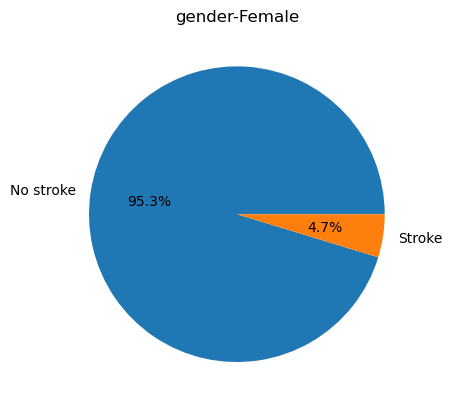

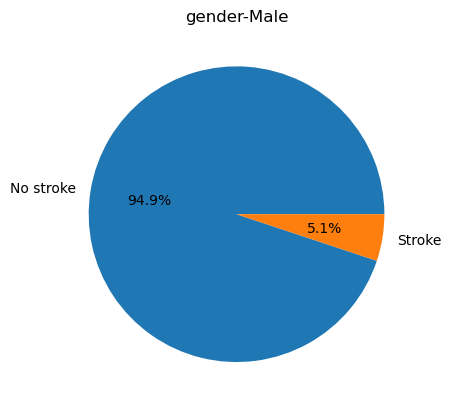

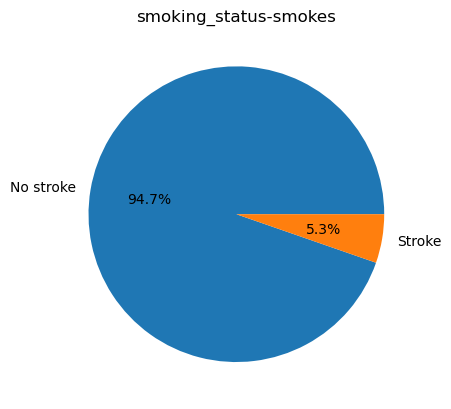

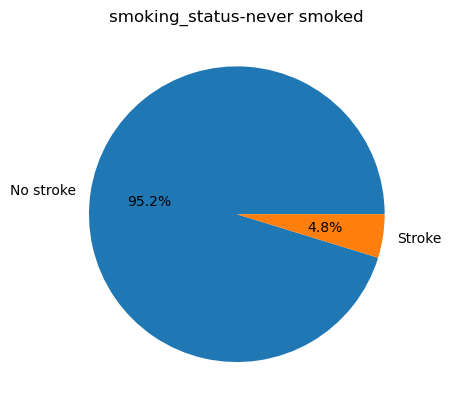

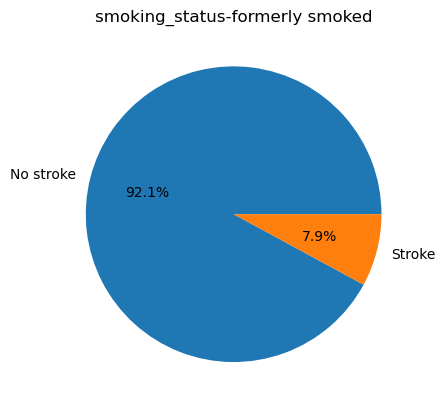

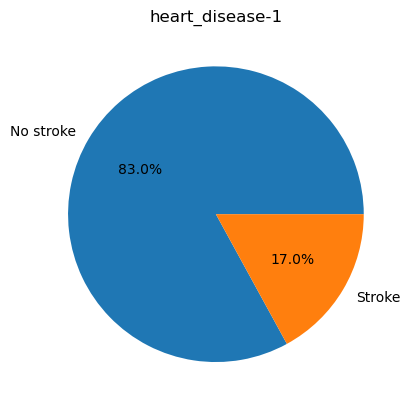

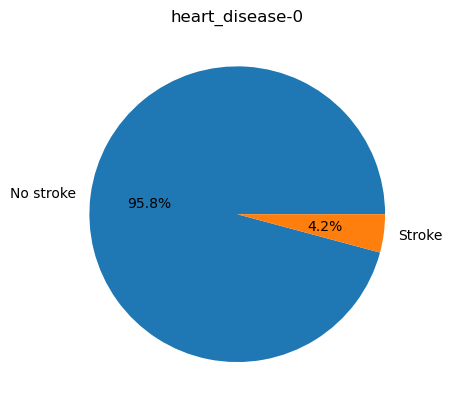

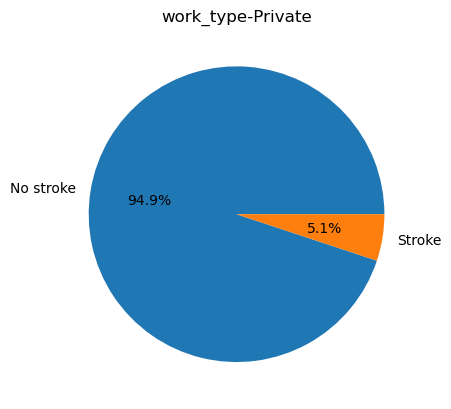

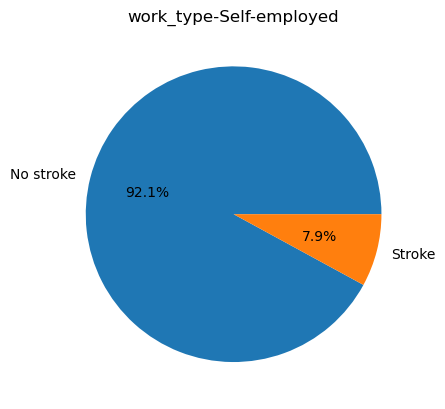

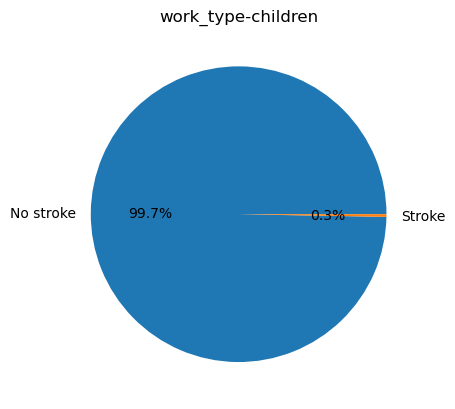

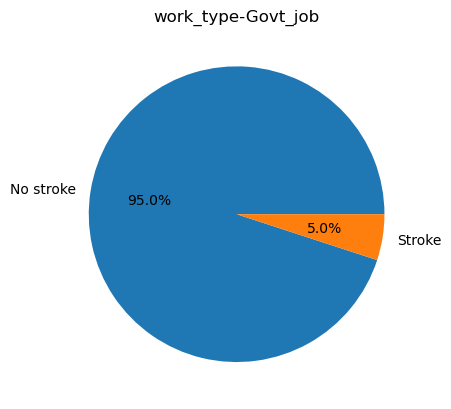

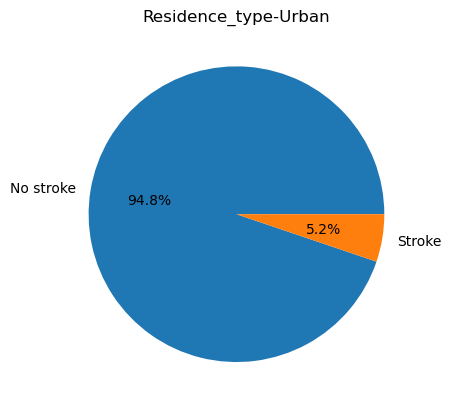

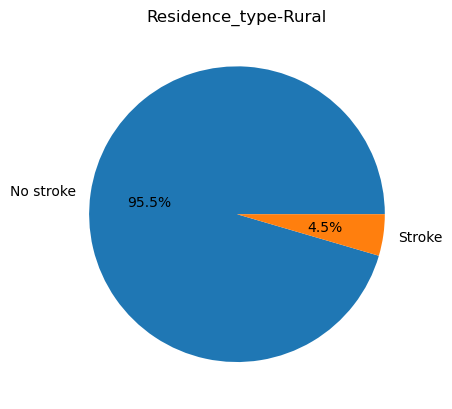

In [32]:
import matplotlib.pyplot as plt


def pie_plot(x, y, title):
    fig, ax = plt.subplots()
    ax.pie(x,labels=y, autopct='%1.1f%%')
    ax.set_title(title)
    fig.savefig("../data/visualization/%s.png" % title )
    

    
def pie_helper(label, val):
    
    df = get_raw_data()
    
    subset = df[[label, "stroke"]]
    subset = subset.loc[subset[label] == val]
    x = [subset["stroke"].value_counts()[0], subset["stroke"].value_counts()[1]]
    y = ["No stroke", "Stroke"]
    pie_plot(x,y, "%s-%s" % (label, val))
    
def strokes_by_gender():
    
    pie_helper("gender", "Female")
    pie_helper("gender", "Male")
    
    
def strokes_by_smoking():
    
    pie_helper("smoking_status", "smokes")
    pie_helper("smoking_status", "never smoked")
    pie_helper("smoking_status", "formerly smoked")

def strokes_by_heart_disease():
    df = get_raw_data()
    df["heart_disease"].head()
    pie_helper("heart_disease", 1)
    pie_helper("heart_disease", 0)

    
def strokes_by_work_type():
    df = get_raw_data()
    types = df["work_type"].value_counts().index.values
    for i in types:
        if i == "Never_worked":
            continue
        pie_helper("work_type", i)
    
def strokes_by_residence_type():
    df = get_raw_data()
    types = df["Residence_type"].value_counts().index.values
    for i in types:
        pie_helper("Residence_type", i)

strokes_by_gender()
strokes_by_smoking()
strokes_by_heart_disease()
strokes_by_work_type()
strokes_by_residence_type()

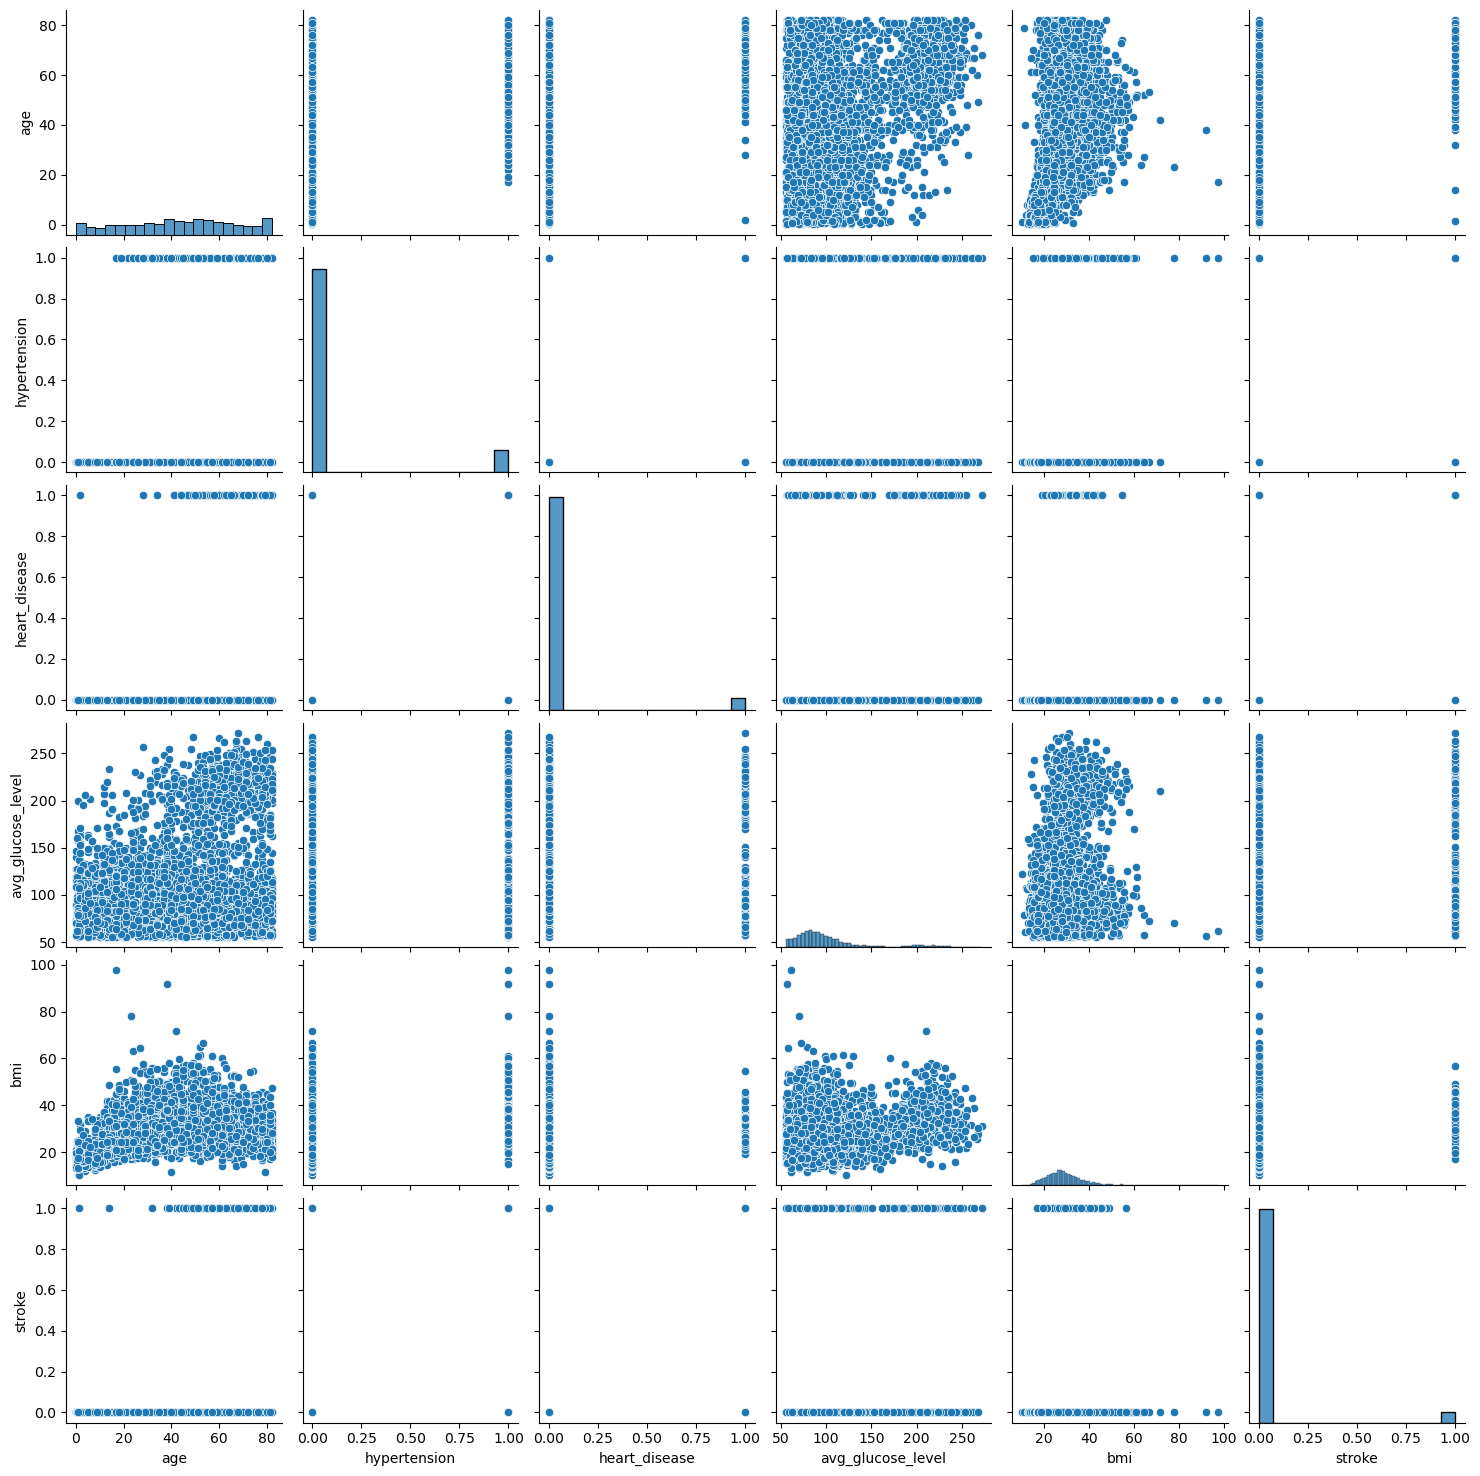

In [8]:
import seaborn as sns
df = get_raw_data()

sns.pairplot(df[get_columns()])

# Smoking status

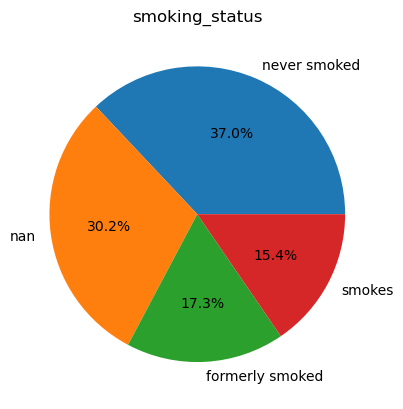

In [25]:
df = get_raw_data()
y = df["smoking_status"].value_counts(dropna=False).index.values
x = df["smoking_status"].value_counts(dropna=False).values
pie_plot(x,y, "smoking_status")


# Job distribution

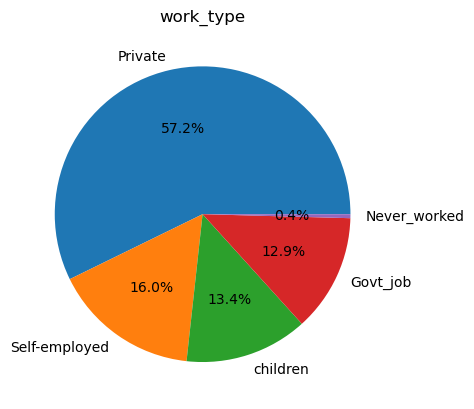

In [33]:
df = get_raw_data()
y = df["work_type"].value_counts(dropna=False).index.values
x = df["work_type"].value_counts(dropna=False).values
pie_plot(x,y, "work_type")

# Residence type

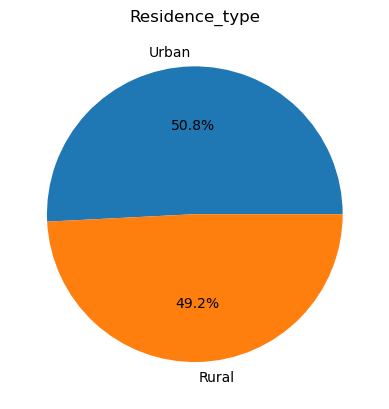

In [34]:
df = get_raw_data()
y = df["Residence_type"].value_counts(dropna=False).index.values
x = df["Residence_type"].value_counts(dropna=False).values
pie_plot(x,y, "Residence_type")

# Ever married

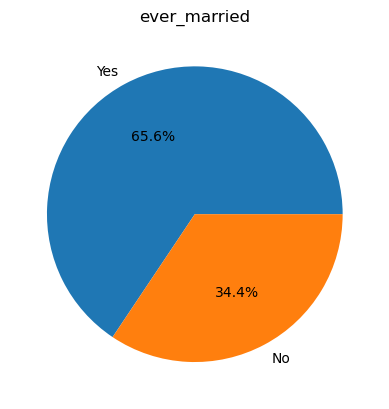

In [59]:
df = get_raw_data()
y = df["ever_married"].value_counts(dropna=False).index.values
x = df["ever_married"].value_counts(dropna=False).values
pie_plot(x,y, "ever_married")

# Correlation matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


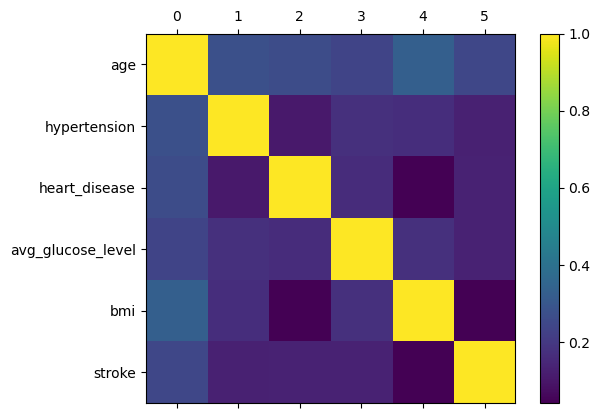

In [54]:
df = get_raw_data()
corr = df.corr()

fig, ax = plt.subplots()

cbar = ax.matshow(corr, interpolation='nearest')
fig.colorbar(cbar)
alpha = corr.columns

xaxis = np.arange(len(max(alpha)))
ax.set_yticks(xaxis)
ax.set_yticklabels(alpha)
fig.savefig("../data/visualization/corr_matrix.png")
corr

In [36]:
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# BMI

<AxesSubplot:xlabel='bmi', ylabel='Density'>

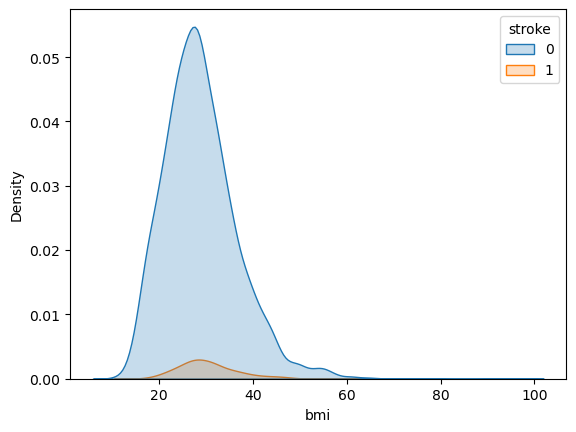

In [74]:
df = get_raw_data()
sns.kdeplot(data=df, x="bmi", hue="stroke", fill=True)


# Glucose level

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

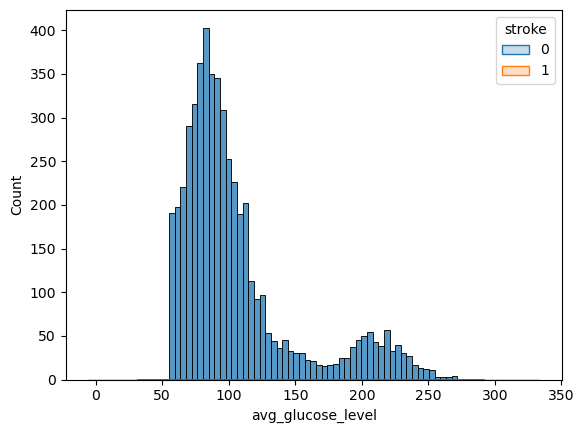

In [72]:
df = get_raw_data()
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", fill=True)


# Age

<AxesSubplot:xlabel='age', ylabel='Density'>

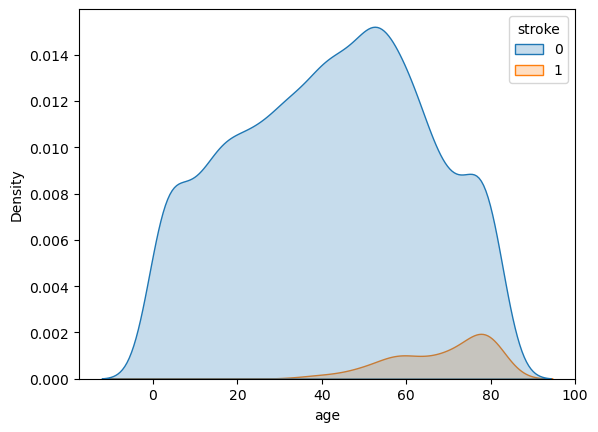

In [73]:
df = get_raw_data()
sns.kdeplot(data=df, x="age", hue="stroke", fill=True)


In [70]:
df = get_raw_data()
for i in get_columns():
    a = df[i].value_counts(dropna=False)
    print("--------------")
    print("For column: %s" % i)
    print(a)
    print("---------------")


--------------
For column: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------------
--------------
For column: age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
---------------
--------------
For column: hypertension
0    4612
1     498
Name: hypertension, dtype: int64
---------------
--------------
For column: heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
---------------
--------------
For column: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
---------------
--------------
For column: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------------
--------------
For column: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------------
----